In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
import pandas as pd
import numpy as np
from numpy.linalg import pinv
from numpy import linalg

In [2]:
train_input = pd.read_csv("trainInput.csv", header= None)
train_input = train_input.T
train_input

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.304,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,-0.318,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.466,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,-1.0,-1.0,-1.0,-1.000,-1.000,-0.889,0.497,0.988,0.244,-0.861,...,0.401,0.752,1.000,0.609,0.206,-0.974,-1.000,-1.000,-1.000,-1.0
1703,-1.0,-1.0,-1.0,-1.000,-1.000,-0.961,-0.211,0.647,0.464,-0.071,...,-0.983,0.635,0.236,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1704,-1.0,-1.0,-1.0,-1.000,-0.948,-0.307,-0.718,-0.178,0.543,1.000,...,-0.822,0.720,-0.716,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0
1705,-1.0,-1.0,-1.0,-1.000,-1.000,-0.806,0.417,1.000,0.627,-0.559,...,0.491,0.866,-0.712,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0


In [3]:
train_output = pd.read_csv("trainOutput.csv", header=None)
train_output = train_output.T
train_output

,0
0,6
1,5
2,4
3,7
4,3
...,...
1702,8
1703,9
1704,7
1705,9


In [4]:
# add train output to train input to identify which number the image represents
train_input["train_output"] = train_output
train_input

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,train_output
0,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.631,0.862,-0.167,...,0.823,1.000,0.482,-0.474,-0.991,-1.000,-1.000,-1.000,-1.0,6
1,-1.0,-1.0,-1.0,-0.813,-0.671,-0.809,-0.887,-0.671,-0.853,-1.000,...,-0.671,-0.033,0.761,0.762,0.126,-0.095,-0.671,-0.828,-1.0,5
2,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-0.996,...,-1.000,-1.000,-0.109,1.000,-0.179,-1.000,-1.000,-1.000,-1.0,4
3,-1.0,-1.0,-1.0,-1.000,-1.000,-0.273,0.684,0.960,0.450,-0.067,...,1.000,0.536,-0.987,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7
4,-1.0,-1.0,-1.0,-1.000,-1.000,-0.928,-0.204,0.751,0.466,0.234,...,0.639,1.000,1.000,0.791,0.439,-0.199,-0.883,-1.000,-1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1702,-1.0,-1.0,-1.0,-1.000,-1.000,-0.889,0.497,0.988,0.244,-0.861,...,0.752,1.000,0.609,0.206,-0.974,-1.000,-1.000,-1.000,-1.0,8
1703,-1.0,-1.0,-1.0,-1.000,-1.000,-0.961,-0.211,0.647,0.464,-0.071,...,0.635,0.236,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,9
1704,-1.0,-1.0,-1.0,-1.000,-0.948,-0.307,-0.718,-0.178,0.543,1.000,...,0.720,-0.716,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,7
1705,-1.0,-1.0,-1.0,-1.000,-1.000,-0.806,0.417,1.000,0.627,-0.559,...,0.866,-0.712,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,9


In [5]:
# sort train input by train output in ascending order
train_input = train_input.sort_values(by = "train_output", ascending= True)
train_input

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,train_output
363,-1.0,-1.0,-1.0,-0.828,-0.235,-0.067,-0.515,-0.970,-1.000,-0.996,...,-0.067,-0.067,-0.067,-0.655,-0.801,-1.0,-1.0,-1.0,-1.0,0
1536,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.934,0.519,0.941,-0.072,...,0.748,1.000,0.327,-0.600,-1.000,-1.0,-1.0,-1.0,-1.0,0
1169,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.751,0.455,0.878,0.057,...,1.000,0.952,0.347,0.000,-0.953,-1.0,-1.0,-1.0,-1.0,0
1168,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.959,-0.300,0.747,0.785,...,1.000,0.794,0.372,0.062,-0.867,-1.0,-1.0,-1.0,-1.0,0
1165,-1.0,-1.0,-1.0,-1.000,-1.000,-0.714,0.063,-0.825,-1.000,-1.000,...,-0.850,-0.850,-0.964,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,-1.0,-1.0,-1.0,-1.000,-1.000,-0.525,0.322,0.890,0.623,-0.342,...,0.651,-0.444,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,9
746,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.847,0.317,1.000,0.874,...,-0.455,0.864,-0.616,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,9
729,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.573,0.530,1.000,0.738,...,-0.044,-0.049,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,9
726,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.128,0.867,1.000,...,-0.619,0.910,-0.465,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,9


In [6]:
test_input = pd.read_csv("testInput.csv", header = None)
test_input = test_input.T
test_input

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.0,-1.0,-1.0,-1.000,-1.000,-0.948,-0.561,0.148,0.384,0.904,...,-1.000,-0.908,0.430,0.622,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2,-1.0,-1.0,-1.0,-0.593,0.700,1.000,1.000,1.000,1.000,0.853,...,1.000,0.717,0.333,0.162,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.000,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-1.000,-0.858,-0.106,0.802,...,0.901,0.901,0.901,0.290,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,-1.0,-1.0,-1.0,-1.000,-1.000,-0.417,0.814,1.000,0.775,-0.723,...,1.000,1.000,0.554,0.184,-0.484,-1.000,-1.0,-1.0,-1.0,-1.0
2003,-1.0,-1.0,-1.0,-1.000,-1.000,-1.000,-0.855,0.209,0.941,0.809,...,-1.000,0.319,1.000,0.056,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2004,-1.0,-1.0,-1.0,-1.000,-0.031,0.752,-0.431,-1.000,-1.000,-1.000,...,1.000,0.928,-0.393,-1.000,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0
2005,-1.0,-1.0,-1.0,-1.000,-0.534,0.578,1.000,0.301,-0.328,-0.939,...,1.000,0.430,0.200,-0.061,-0.975,-1.000,-1.0,-1.0,-1.0,-1.0


In [7]:
test_output = pd.read_csv("testOutput.csv", header = None)
test_output = test_output.T
test_output

,0
0,9
1,6
2,3
3,6
4,6
...,...
2002,3
2003,9
2004,4
2005,0


In [8]:


def find_A(train_input):
    a_dict = {}
    for i in range(0,10):
            a = train_input[train_input["train_output"] == i]
            a= a.drop(columns = ["train_output"], errors = "ignore")
            a_dict[i] = a
    return(a_dict)

def find_V(a_dict):
    v_dict = {}
    for key, value in a_dict.items():
        value = value.to_numpy()
        u,s,vt = np.linalg.svd(value)
        v = vt[0:20]
        v = v.T
        v_dict[key] = v
    return(v_dict)
    

def make_predictions(test_input, v_dict, test_output):
    predictions = []
    test_images = test_input.to_numpy()
    for test_image in test_images:
        error = []
        for i in range(0,10):
            x = pinv(v_dict[i])@test_image
            err = np.linalg.norm(test_image - v_dict[i]@x)
            error.append(err)
        minimum = min(error)
        digit = error.index(minimum)
        predictions.append(digit)

    test_output['pred'] = predictions
    predictions = np.array(predictions)
    return predictions

a_dict = find_A(train_input)
v_dict = find_V(a_dict)
predictions = make_predictions(test_input, v_dict, test_output)


true_labels = test_output.iloc[:,0].to_numpy() 

accuracy = accuracy_score(true_labels, predictions)
conf_mat = confusion_matrix(true_labels, predictions)

print(f"Overall Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_mat)



Overall Accuracy: 93.97%
Confusion Matrix:
 [[355   0   2   0   1   0   0   0   0   1]
 [  0 259   0   0   3   0   2   0   0   0]
 [  8   1 179   2   3   0   0   1   4   0]
 [  1   0   4 148   1   8   0   1   2   1]
 [  1   1   0   0 187   1   1   3   0   6]
 [  8   1   2   4   0 140   0   0   2   3]
 [  2   0   0   0   2   2 164   0   0   0]
 [  0   1   1   0   3   0   0 139   0   3]
 [  4   0   2   6   0   1   0   0 149   4]
 [  0   1   0   1   4   0   0   4   1 166]]


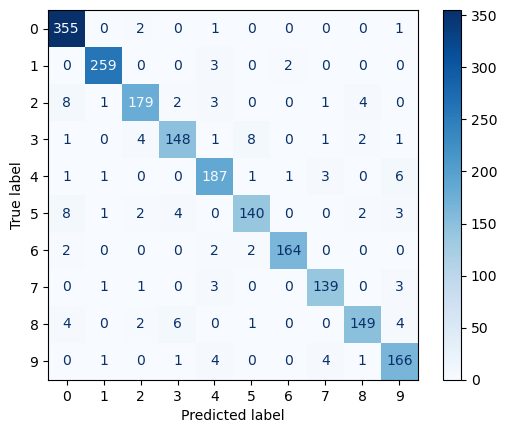

In [10]:
display_matrix = ConfusionMatrixDisplay(confusion_matrix= conf_mat)
display_matrix.plot(cmap = "Blues")